In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\Aastha singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
np.random.seed(0)

In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

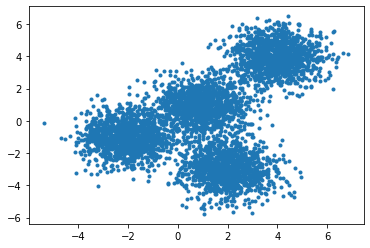

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [6]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)>

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0])

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

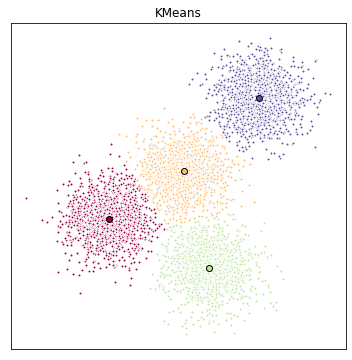

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 6))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


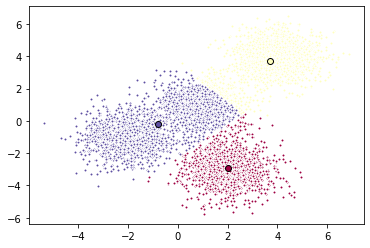

In [12]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


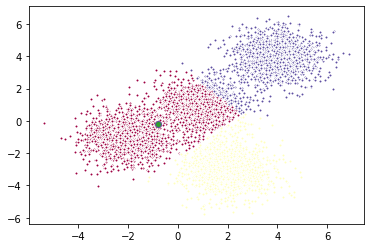

In [13]:
k_means = KMeans(init = 'k-means++' , n_clusters =3 , n_init =12)
k_means.fit(X)
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0 , 1 , len(set(k_means.labels_))))
ax = fig.add_subplot(1,1,1)
for k ,col in zip(range(len(k_means.cluster_centers_)) , colors):
    my_members = (k_means.labels_ == k)
    custer_centers = k_means.cluster_centers_[k]
    ax.plot(X[my_members , 0] , X[my_members , 1] , 'w', markerfacecolor = col , marker = '.')
    ax.plot(cluster_center[0] , cluster_center[1] , 'o' , markeredgecolor = col , markersize = 6)
    
plt.show()

#### Hierarchy Clustering

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline


plt.figure(figsize = (6,4))

xmin , xmax = np.min(X , axis =0) , np.max(X , axis =0)

#average

X = (X - xmin) / (xmax - xmin)

for i in range(X.shape[0]):
    plt.text(X[i , 0] , X[i,1] , str(y[i]) , color = plt.cm.nipy_spectral(k_means.labels_[i] / 10.) , 
             fontdict = { 'weight': 'bold' , 'size':9})
    
plt.xticks([])
plt.yticks([])

plt.scatter(X[:,0] , X[:,1] , marker = '.')
plt.show()

In [25]:
dist_matrix = distance_matrix(X ,X)
print(dist_matrix)

[[0.         0.40827161 0.34884569 ... 0.54002221 0.03199818 0.04794265]
 [0.40827161 0.         0.11137047 ... 0.59325744 0.38223398 0.4264792 ]
 [0.34884569 0.11137047 0.         ... 0.64484035 0.31893891 0.37748057]
 ...
 [0.54002221 0.59325744 0.64484035 ... 0.         0.55191696 0.50059309]
 [0.03199818 0.38223398 0.31893891 ... 0.55191696 0.         0.07607382]
 [0.04794265 0.4264792  0.37748057 ... 0.50059309 0.07607382 0.        ]]


In [27]:
z = hierarchy.linkage(dist_matrix ,'complete')

C:\Users\Aastha singh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


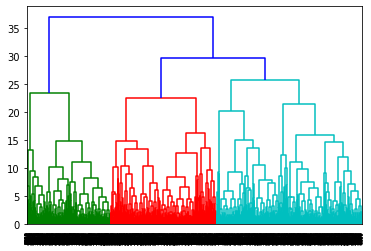

In [29]:
dendro = hierarchy.dendrogram(z)